 Please run the JSON creators found in PreProcessing folder or download an example by runnnig the commeted code below

In [2]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid
from RoutePlanner.IO import LoadIcePoints, LoadCurrentPoints
from RoutePlanner.Optimisation import TravelTime

In [3]:
OptInfo = {}
OptInfo['Bounds Longitude']     = [230,360]
OptInfo['Bounds Latitude']      = [-80,-40]
OptInfo['Grid Spacing (dx,dy)'] = [5,2.5]
OptInfo['Start Time']           = '2017-05-01'
OptInfo['End Time']             = '2017-06-01'
OptInfo['WayPoints']            = pd.read_csv('../resources/WayPoint_LongPaths.csv') 
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = True
OptInfo['VariableSpeed']        = False
OptInfo['Time Unit']            = 'days'
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'
OptInfo['Start Waypoints']      = None

In [3]:
icePoints     = LoadIcePoints('../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc',OptInfo['Start Time'],OptInfo['End Time'])
currentPoints = LoadCurrentPoints('../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc')

cellGrid = CellGrid(OptInfo)
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(3)

TT = TravelTime(cellGrid)
TT.Dijkstra(verbrose=True)

=== Processing Waypoint = LongPathStart ===
=== Processing Waypoint = LongPathEnd ===


KeyboardInterrupt: 

(-65.0, -55.0)

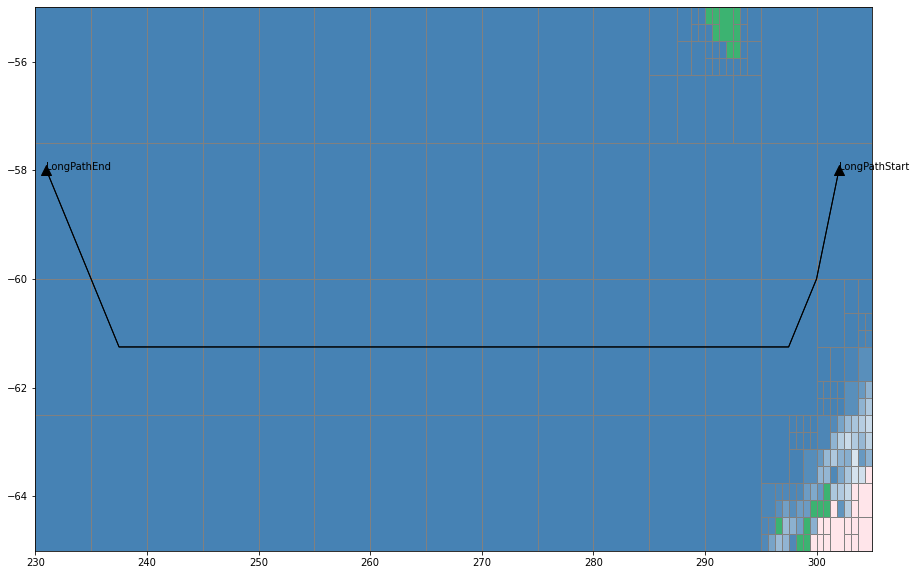

In [5]:
ax = TT.PlotPaths()
ax.set_xlim([230,305])
ax.set_ylim([-65,-55])

(-65.0, -55.0)

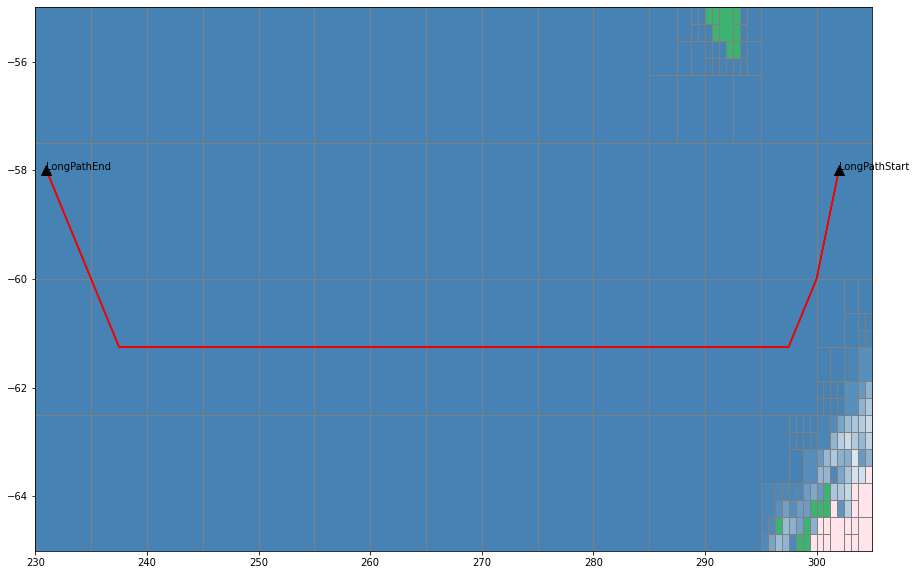

In [20]:
ax = TT.PlotPaths()

# Plotting the ground truths
GT = pd.read_csv('../resources/GroundTruth_LongPath_Start2End.csv')
GT['Long'] = GT['Long']+360
ax.plot(GT['Long'],GT['Lat'],'r')
GT = pd.read_csv('../resources/GroundTruth_LongPath_End2Start.csv')
GT['Long'] = GT['Long']+360
ax.plot(GT['Long'],GT['Lat'],'r')

ax.set_xlim([230,305])
ax.set_ylim([-65,-55])